# Stock Market Time-Series Analysis and Forecasting in Python
------
### Introduction to the Stock Market
The New York Stock Exchange (NYSE), the American stock exchange, 
sanctions the buying and trading of shares for publicly 
registered companies. The public stock exchange allows businesses to
raise financial capital by selling shares of ownership. The value of a share to 
investors is measured by a stock price. There are many variables and uncertainties which
can influence a stock's price away from market equilibrium. Overly optimistic or pessimistic 
conditions can drive stock value excessively high or low. The erratic nature of 
stock behavior creates a market risk. Investors look for stocks with 
value expected to rise while avoiding stocks with value expected to decrease.
Knowledge of stock price movement is essential for minimizing market risk.    

### Objective
The goal of this project is to explore the knowledge discovery from
financial data (KDD) process for several stocks in the technology sector (listed in table). 
The information (historical stock quotes) will be retrieved live from the Yahoo! Finance web service. 
The Collected information is then formatted as a financial time series. 
This mathematical model is ideal for finding statistical descriptions and data visualizations of 
asset evaluation over time. 

| Technology Stock | Ticker |
|---------------|--------------|
| Adv Micro Devices | (**AMD**) | 
| Cisco Systems Inc | (**CSCO**) | 
| Intel Corp | (**INTC**) | 
| Micron Technology | (**MU**) | 
| Nvidia Corp | (**NVDA**) |
| Oracle Corp | (**ORCL**) | 
| Qualcomm Inc | (**QCOM**) | 

The process of knowledge discovery from the financial data will be split into two parts:
   
**Part 1**: For the first part, interesting knowledge will be discovered using statistical methods. These will describe 
the collection, analysis, interpretation, and presentation of the data. A *statistical model* is established
mathematical functions describing the behavior of objects in terms of random variables and their associated
probability distributions. This Project is based on the previously mentioned statistical model 
known as a time series. A central idea of the project will be understanding a financial time series using 
*statistical descriptions*. These will be used to identify the properties of the series and find 
data values which are noise or outliers. This will merge with the last concept of Part 1, *relevance analysis*, 
which is the first step in the data mining functionality: Classification and Regression for Predictive Analysis. 
This is described as attempting to identify attributes which are more relevant to the predictive process. 

**Part 2**: The second part of the knowledge discovery from data (KDD) process is based on 
the *predictive analysis* concepts of the data mining functionality: Classification and Regression for 
Predictive Analysis. The predictive process is a type of *Supervised Learning* because the extracted 
dataset will serve as "supervision" for the learning process. Attributes from the preprocessed 
data in Part 1 will make up the training set for the Classification learning phase. A classifier will 
be constructed to predict a financial attribute.    


## (Part 1) Time Series Analysis
----------------

##### Definition:

The **Time Series** on a variable/attribute *a* is indicated as *a<sub>t</sub>*, with the subscript t 
representing time. The first and last observations available on attribute *a* are at t = 1, and t = T.

Essentially, a time series contains quantitative observations on one or more assessable characteristics of
an entity, taken at multiple points in time. 

The set of times t = {1, 2,.. ,T} is referred to as the *observation period*.
<pre>    
    Observations are typically measured in equally spaced intervals (frequency), (i.e minute, hour, 
    day, etc... for finance). 
</pre>

Financial data is a fixed frequency time series, meaning the 
data points occur at regular intervals. This project will focus on financial time series with a daily 
frequency. Higher frequencies in financial time series is referred to as "high frequency" or "tick-by-tick" data.

For financial data, because the mean level cannot be regarded as a constant, the series is said to be *nonstationary*
    
##### Analysis:

Time series analysis utilizes data to understand and interpret the underlying variables that generate
the observed state of a process over time. 

To achieve this, time series analysis applies different statistical methods to explore and model the internal 
structures of the time series data. 

Several interesting internal structures are:  trend, seasonality, stationarity, autocorrelation, etc..

The internal structures require special formulation and techniques for their analysis 


##### Time Series Package Imports


In [4]:
#  NumPy and Pandas imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#  Reading time series
from pandas_datareader import data

#  Time stamps
import datetime as datetime

#  Visualization (sns is a visualization library based on matplotlib)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


##### Retrieving Stock Price Movement
The historical price quote is made up of tuples with 7 associated class labels.
Therefore, a tuple is represented as a 7-dimensional attribute vector (Date, High, Low, Open, Close, Volume, Adj Close).

Attribute Information:

*   Date: The daily interval the stock quote is observed
*   High: The highest share price for Date
*   Low: The lowest share price for Date
*   Open: The opening share price on Date
*   Close: The closing share price on Date
*   Volume: The number of shares traded on Date
*   Adj Close: The closing price adjusted for corporate actions on Date

The pandas_datareader package is used to get a Yahoo! Finance
historical price database of each stock
 

In [7]:
#  Stock tickers to retrieve historical index data
ticker_index_data = ['AMD', 'CSCO', 'INTC', 'MU', 'NVDA', 'ORCL', 'QCOM']

#  Assign a database with historical stock quotes from Yahoo! Finance to each ticker
for ticker in ticker_index_data:
    globals()[ticker] = data.get_data_yahoo(ticker, '2017-04-10', '2019-04-10')

#  Display the five most recent results
AMD.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-05,29.690001,28.799999,29.639999,28.980000,65662700,28.980000
2019-04-08,28.950001,28.180000,28.690001,28.530001,58002500,28.530001
2019-04-09,28.379999,27.190001,28.240000,27.240000,75539800,27.240000
2019-04-10,28.120001,27.320000,27.459999,27.830000,64368100,27.830000
2019-04-11,28.049999,27.459999,27.809999,27.790001,44801200,27.790001


##### Visualization of Financial Data

The historical view of a shares closing price ('Adj Closing' preferred to 'Closing')

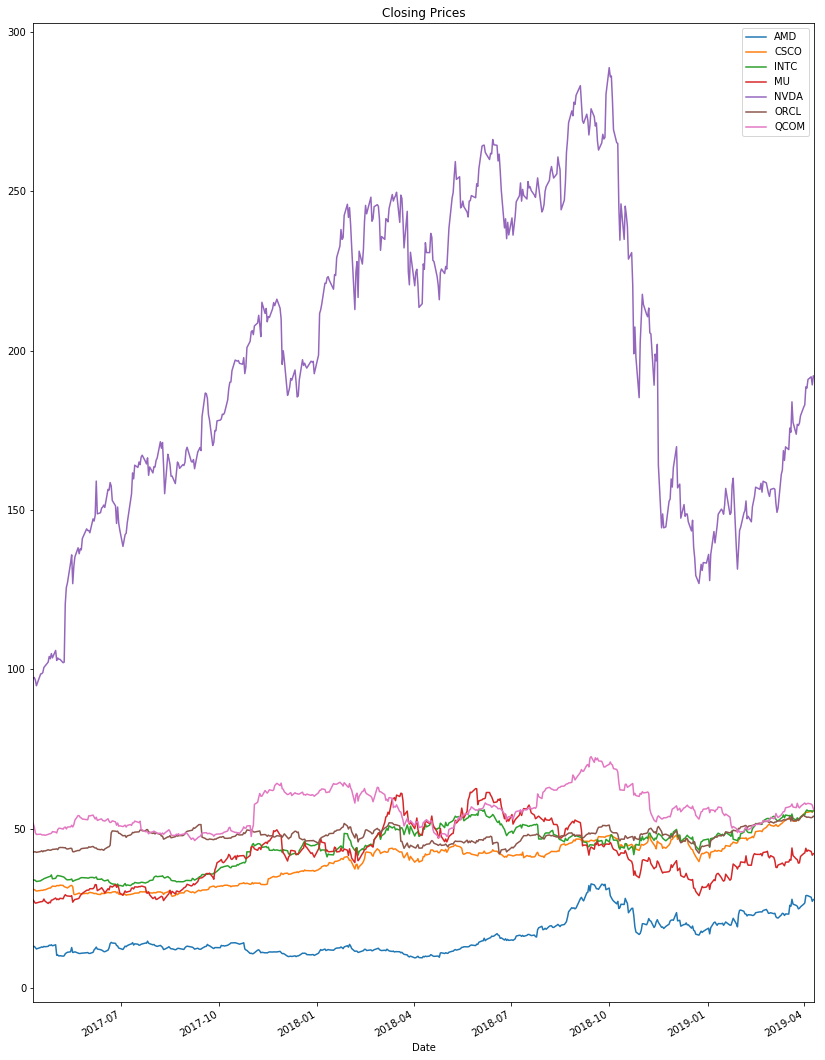

In [19]:
sub_plot_counter = 0
#fig, axs = plt.subplots(1)

AMD['Adj Close'].plot(legend=True, label='AMD', title='Closing Prices', figsize=(14,20))
CSCO['Adj Close'].plot(legend=True, label='CSCO')
INTC['Adj Close'].plot(legend=True, label='INTC')
MU['Adj Close'].plot(legend=True, label='MU')
NVDA['Adj Close'].plot(legend=True, label='NVDA')
ORCL['Adj Close'].plot(legend=True, label='ORCL')
QCOM['Adj Close'].plot(legend=True, label='QCOM')


x = 3
